In [56]:
import numpy as np
import pandas as pd
import gen_data
import regex as re
import seaborn as sns

# t0_GDP = pd.read_csv('GDP_dat.csv').loc[:,['State','stateGDP_t0']]
# t0_GDP.head()

In [57]:
industries = pd.read_csv('IndustryByState_2005-2021.csv').drop(columns=['GeoFips','LineCode'])
industries.loc[:,'Description'] = industries.loc[:,'Description'].apply(lambda x: x.strip())
industries = industries.set_index(['GeoName', 'Description']).mean(axis=1).reset_index('Description')
industries = industries.pivot(columns='Description',values=0)
industries.columns = industries.columns.to_list()
industries.index.rename('State', inplace=True)
industries = industries[['Information']].rename(columns = {'Information':'GDPcont_t0'})
industries.sort_values('GDPcont_t0', ascending = False)

,GDPcont_t0
State,
Washington,0.947419
California,0.709355
New York,0.465806
Pennsylvania,0.418226
Georgia,0.370968
Connecticut,0.313871
Utah,0.310000
Colorado,0.268387
Massachusetts,0.259516


In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
simDat = gen_data.sim_data(industries, **gen_data.sim_params)
treatment_years = simDat.loc[:,['treatment_year']]
treatment_years
# simDat

,treatment_year
State,
Washington,25.0
California,NaN
New York,25.0
Pennsylvania,25.0
Georgia,NaN
Connecticut,NaN
Utah,NaN
Colorado,NaN
Massachusetts,NaN


In [60]:
simDat

,GDPcont_t0,treatment_year,GDPcont_t1,GDPcont_t2,GDPcont_t3,GDPcont_t4,GDPcont_t5,GDPcont_t6,GDPcont_t7,GDPcont_t8,...,GDPcont_t41,GDPcont_t42,GDPcont_t43,GDPcont_t44,GDPcont_t45,GDPcont_t46,GDPcont_t47,GDPcont_t48,GDPcont_t49,GDPcont_t50
State,,,,,,,,,,,,,,,,,,,,,
Washington,0.947419,25.0,0.945226,0.960646,0.970394,0.991848,1.019445,1.036399,1.060182,1.073406,...,1.826320,1.825577,1.851098,1.874581,1.897158,1.930581,1.947270,1.974222,1.986992,2.014277
California,0.709355,NaN,0.722376,0.769982,0.781453,0.793947,0.810901,0.834033,0.866985,0.882170,...,1.490882,1.515538,1.530190,1.551546,1.589897,1.619515,1.639838,1.655420,1.683793,1.722689
New York,0.465806,25.0,0.480421,0.498750,0.510500,0.540517,0.556283,0.578139,0.598977,0.631888,...,1.300557,1.317265,1.338575,1.361575,1.377842,1.406057,1.456372,1.469212,1.500698,1.528156
Pennsylvania,0.418226,25.0,0.412341,0.419822,0.442501,0.455513,0.475001,0.497366,0.539739,0.576908,...,1.406557,1.426076,1.468400,1.499312,1.499672,1.534178,1.558301,1.573414,1.596422,1.622878
Georgia,0.370968,NaN,0.392898,0.417933,0.439716,0.466563,0.482447,0.506562,0.515646,0.533267,...,1.209345,1.231517,1.244189,1.252016,1.267655,1.280043,1.302512,1.318951,1.348826,1.374829
Connecticut,0.313871,NaN,0.335795,0.349516,0.373349,0.386581,0.422449,0.441701,0.464703,0.481384,...,1.117909,1.142089,1.171894,1.201351,1.211912,1.224457,1.229384,1.261290,1.280631,1.300820
Utah,0.310000,NaN,0.326210,0.357817,0.374700,0.395241,0.400059,0.412462,0.424451,0.444519,...,1.182952,1.206220,1.239964,1.264504,1.291051,1.312101,1.351683,1.352350,1.375630,1.404392
Colorado,0.268387,NaN,0.280038,0.304932,0.315445,0.319850,0.339472,0.363610,0.365058,0.380281,...,0.932336,0.954673,0.972818,0.989144,1.010316,1.015126,1.034020,1.063965,1.086568,1.108645
Massachusetts,0.259516,NaN,0.252713,0.278011,0.294874,0.324108,0.328262,0.352714,0.366292,0.396460,...,1.002043,1.021064,1.033410,1.058695,1.079975,1.110635,1.124940,1.145122,1.157492,1.185382


In [61]:
simLong = simDat.drop(columns = 'treatment_year').unstack().reset_index()
simLong.loc[:,'t'] = simLong.loc[:,'level_0'].apply(
    lambda x: int(re.findall('\d*$', x)[0]))
simLong = simLong.drop(columns = 'level_0').rename(columns = {0:'GDPcont_t'})
simLong

,State,GDPcont_t,t
0,Washington,0.947419,0
1,California,0.709355,0
2,New York,0.465806,0
3,Pennsylvania,0.418226,0
4,Georgia,0.370968,0
...,...,...,...
2545,Indiana,1.046569,50
2546,Arkansas,0.956436,50
2547,Alabama,1.033768,50
2548,Maine,1.190947,50


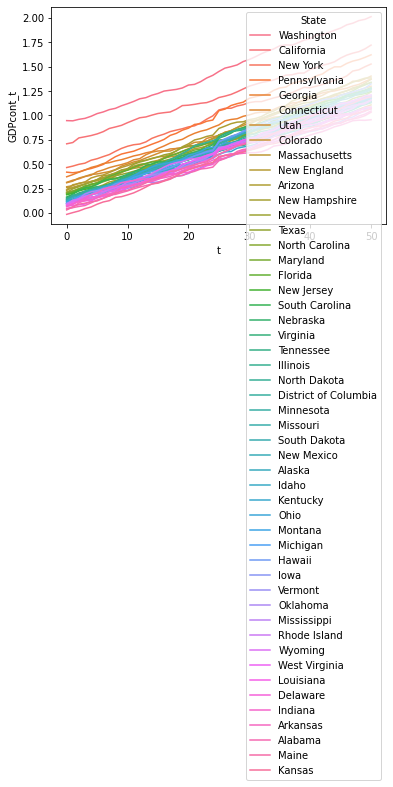

In [62]:
ax = sns.lineplot(data= simLong, x = 't', y = 'GDPcont_t', hue = 'State')
# ax.get_legend().remove()

In [63]:
import fit_model
lm, data, baseline = fit_model.fit_TWFE(data=simLong,
                                    treatment_years=treatment_years,
                                    target = 'GDPcont_t',
                                    linear_time=True,
                                    treat_dummy_type='time_variant')


In [64]:
treatment_years

,treatment_year
State,
Washington,25.0
California,NaN
New York,25.0
Pennsylvania,25.0
Georgia,NaN
Connecticut,NaN
Utah,NaN
Colorado,NaN
Massachusetts,NaN


In [65]:
data

,,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,state_Georgia,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wyoming,t,d
State,t,,,,,,,,,,,,,,,,,,,,,
Washington,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
California,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
New York,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Pennsylvania,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Georgia,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Indiana,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,0
Arkansas,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,1
Alabama,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,1


In [67]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GDPcont_t   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6487.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:06:57   Log-Likelihood:                 5260.1
No. Observations:                2550   AIC:                        -1.042e+04
Df Residuals:                    2498   BIC:                        -1.011e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0079      0.004     -1.768      0.077      -0.017       0.001
state_Alaska                   0.1572      0.006     25.139      0.000       0.145       0.170
state_Arizona                  0.2900      0.006     47.129      0.000       0.278       0.302
state_Arkansas                -0.0063      0.006     -1.030      0.303      -0.018       0.006
state_California               0.6996      0.006    111.843      0.000       0.687       0.712
state_Colorado                 0.1670      0.006     26.703      0.000       0.155       0.179
state_Connecticut              0.3061      0.006     48.939      0.000       0.294       0.318
state_Delaware                 0.0617      0.006     10.033      0.000       0.050       0.074
state_District of Columbia     0.1497      0.006     23.930      0.000       0.137       0.162
state_Florida                  0.2301      0.006     36.791      0.000       0.218       0.242
state_Georgia                  0.3823      0.006     61.113      0.000       0.370       0.395
state_Hawaii                   0.1750      0.006     28.445      0.000       0.163       0.187
state_Idaho                    0.1051      0.006     17.073      0.000       0.093       0.117
state_Illinois                 0.1219      0.006     19.815      0.000       0.110       0.134
state_Indiana                  0.0655      0.006     10.466      0.000       0.053       0.078
state_Iowa                     0.1374      0.006     21.964      0.000       0.125       0.150
state_Kansas                  -0.0029      0.006     -0.476      0.634      -0.015       0.009
state_Kentucky                 0.0978      0.006     15.630      0.000       0.086       0.110
state_Louisiana                0.0274      0.006      4.450      0.000       0.015       0.039
state_Maine                    0.1060      0.006     16.949      0.000       0.094       0.118
state_Maryland                 0.2360      0.006     37.735      0.000       0.224       0.248
state_Massachusetts            0.2189      0.006     34.992      0.000       0.207       0.231
state_Michigan                 0.1525      0.006     24.791      0.000       0.140       0.165
state_Minnesota                0.1271      0.006     20.657      0.000       0.115       0.139
state_Mississippi              0.1200      0.006     19.189      0.000       0.108       0.132
state_Missouri                 0.1241      0.006     19.840      0.000       0.112       0.136
state_Montana                  0.1128      0.006     18.325      0.000       0.101       0.125
state_Nebraska                 0.1906      0.006     30.972      0.000       0.179       0.203
state_Nevada                   0.2194      0.006     35.662      0.000       0.207       0.232
state_New England              0.2670      

In [ ]:
baseline

['state_Alabama']

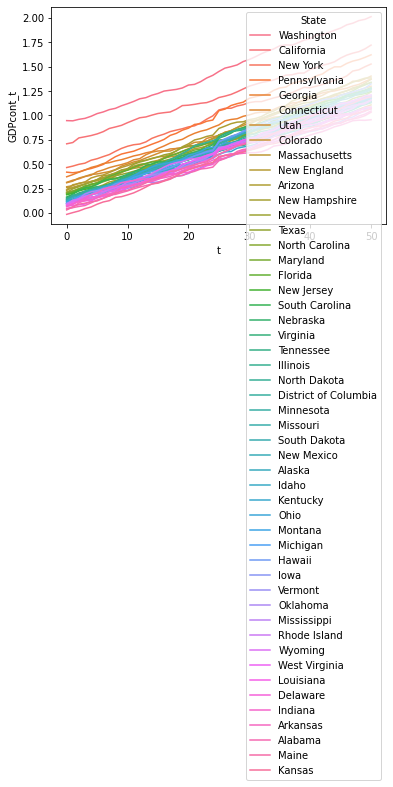

In [68]:
ax = sns.lineplot(data= simLong, x = 't', y = 'GDPcont_t', hue = 'State')


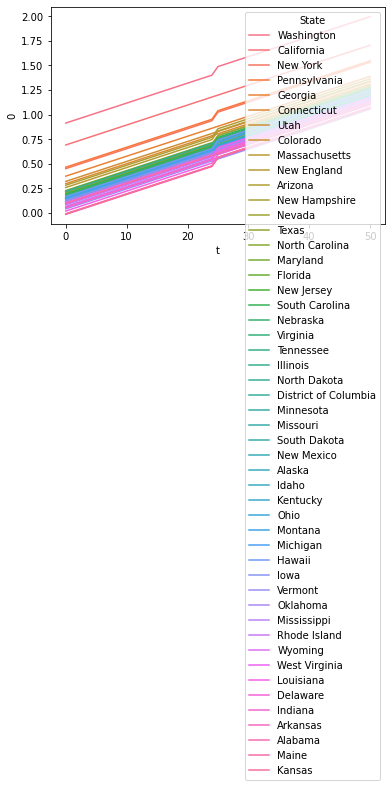

In [69]:
lm.fittedvalues.to_frame()
ax = sns.lineplot(data= lm.fittedvalues.to_frame().reset_index(), x = 't', y = 0, hue = 'State')
